<table><tr>
<td> <img src="../images/URV.png" style="width: 250px;"/> </td>
<td> <img src="../images/UOC.jpg" style="width: 250px;"/> </td>
</tr></table>

# Quantitative analysis of Binance 

<img src="../images/BNB.png" style="width: 200px;"/>

In the following lines we will construct a brief quantitative analysis of Binance. Its purpose is to show the reader the price and return fluctuations of this crypto and to prove whether its returns can be considered as normally-distributed or not.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 6
import seaborn as sb
sb.set()
import pandas_datareader as pdr
import scipy.stats as stats

# Establishing the cryptocurrency ticker
crypto = 'BNB'

___

## Import BNB data

In [2]:
# Importing data with Dask for time optimization
df = pd.read_csv('../Crypto prices/{}USDT.csv'.format(crypto))
df.set_index(pd.to_datetime(df['datetime']), inplace = True)

# First 5 rows
df.head(5)

,datetime,close,perc_return,cum_return,log_return,volume,trades
datetime,,,,,,,
2017-11-06 04:54:00,2017-11-06 04:54:00,1.50,NaN,NaN,NaN,10.83,2
2017-11-06 04:55:00,2017-11-06 04:55:00,1.30,-13.33333,-0.13333,-14.31008,1.00,1
2017-11-06 04:56:00,2017-11-06 04:56:00,0.50,-61.53846,-0.66667,-95.55114,19.00,6
2017-11-06 04:57:00,2017-11-06 04:57:00,0.61,22.00000,-0.59333,19.88509,253.00,17
2017-11-06 04:58:00,2017-11-06 04:58:00,1.10,80.32787,-0.26667,58.96065,85.00,1


___

## Price and return charts

### Setting arrays

In [3]:
# Setting daily data
daily_prices = df[['close']].resample('D').last()

# Creating the log returns for daily prices
daily_return = round(np.log(daily_prices.close).diff().dropna() * 100, 2)

### BNB price time series

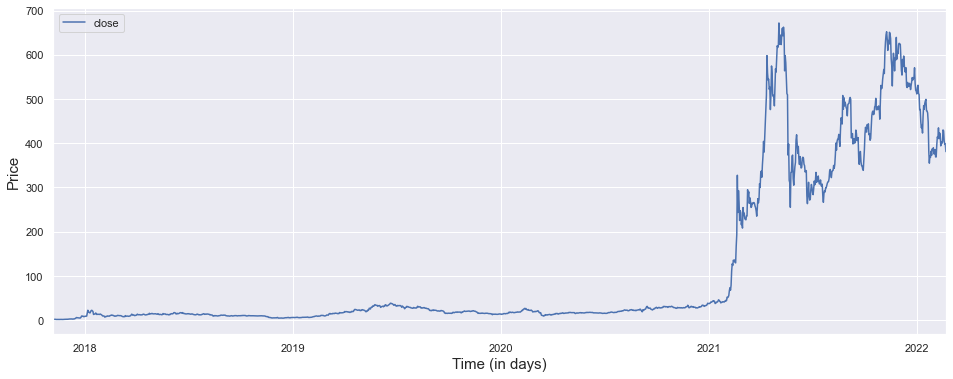

In [4]:
ax1 = daily_prices.plot()
ax1.set_ylabel(ylabel = "Price", fontdict={'fontsize':15})
ax1.set_xlabel(xlabel = "Time (in days)", fontdict={'fontsize':15});

### BNB log returns

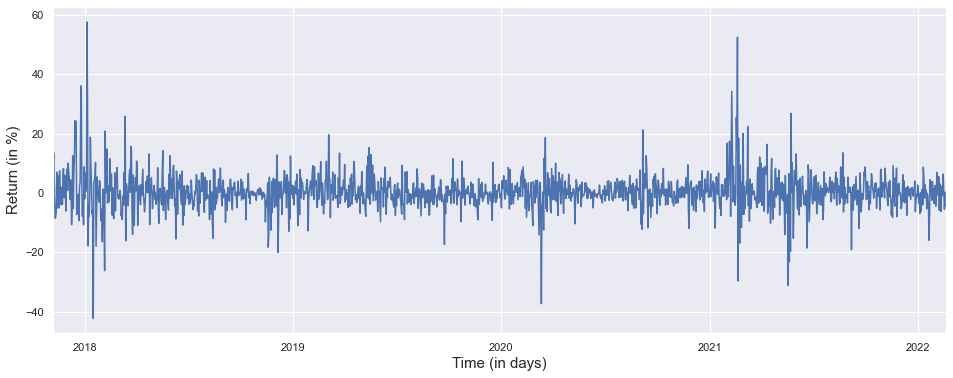

In [5]:
ax2 = daily_return.plot()
ax2.set_ylabel(ylabel = "Return (in %)", fontdict={'fontsize':15})
ax2.set_xlabel(xlabel = "Time (in days)", fontdict={'fontsize':15});

## Assessing normality

We will now compare and assess the normality of the cryptocurrency's returns against some random numbers that follow a normal distribution. For that, we will replicate a normal distribution with the exact same mean, standard deviation and N as the crypto sample. Later, we will provide a Kurtosis test, a Q-Q plot and both histograms.

### Random normally-distributed numbers

We first pull the most elementary statistical metrics from the sample:

In [6]:
n, minmax, mean, var, skew, kurt = stats.describe(daily_return, nan_policy='omit')
mini, maxi = minmax
std = np.sqrt(var)

# Print the recently-extracted data
daily_return.describe()

count    1567.000000
mean        0.350836
std         6.210225
min       -42.320000
25%        -2.370000
50%         0.130000
75%         3.070000
max        57.690000
Name: close, dtype: float64

Then we recreate a normal distribution with the same features as the sample:

In [7]:
# Normally-distributed recreation
normal_distr = stats.norm.rvs(mean, std, n)

### Kurtosis Test

In [8]:
# Kurtosis test for the sample normal distribution
x_test = stats.kurtosistest(normal_distr)

# Kurtosis test for the crypto sample
crypto_test = stats.kurtosistest(daily_return, nan_policy='omit')

# Creating table and showing data
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"{crypto}:  {crypto_test[0]:13.2f}{crypto_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:             0.86          0.3910
BNB:          18.21          0.0000


### Q-Q Plot

#### Normal Sample

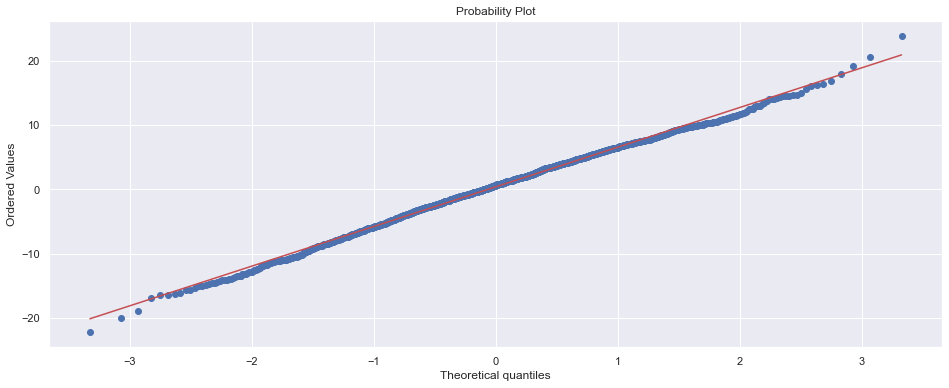

In [9]:
stats.probplot(normal_distr, dist = "norm", plot = plt)
plt.show()

#### BNB Sample

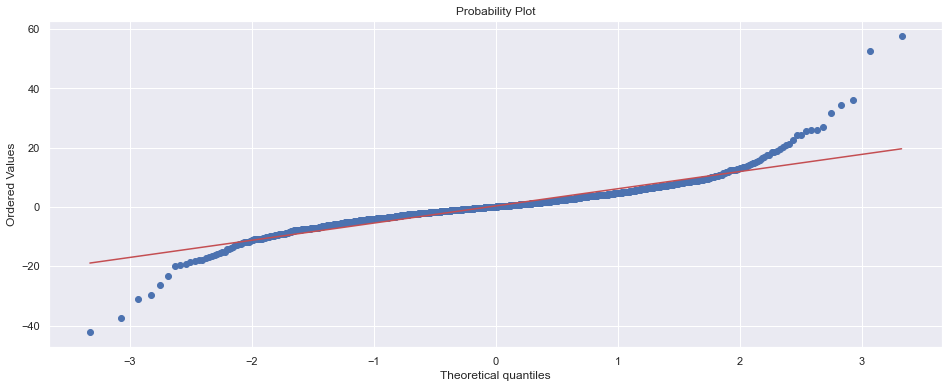

In [10]:
stats.probplot(daily_return, dist = "norm", plot = plt)
plt.show()

### Histograms

#### Normal Sample

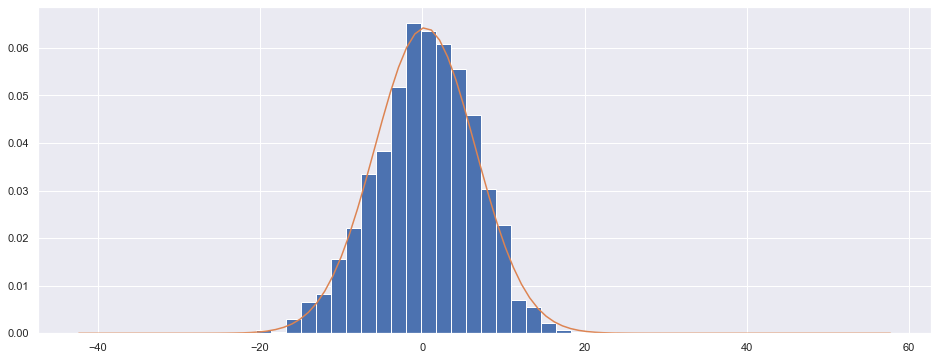

In [11]:
plt.hist(normal_distr, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, stats.norm.pdf(data, mean, std));

#### BNB Sample

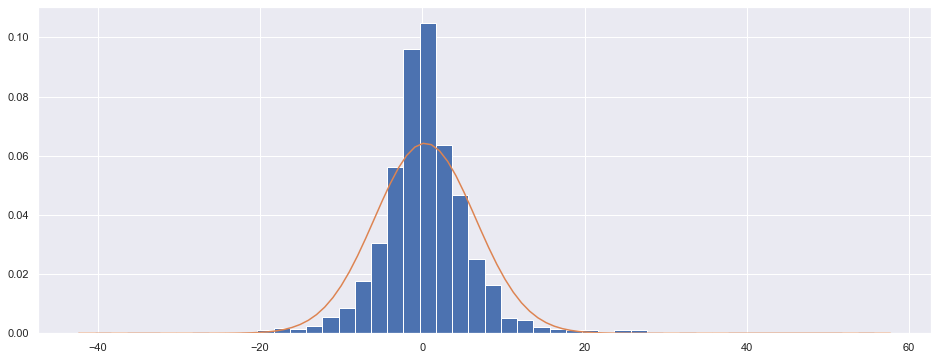

In [12]:
plt.hist(daily_return, bins = 50, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, stats.norm.pdf(data, mean, std));